In [63]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from cvxopt import matrix, solvers

In [64]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

In [65]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

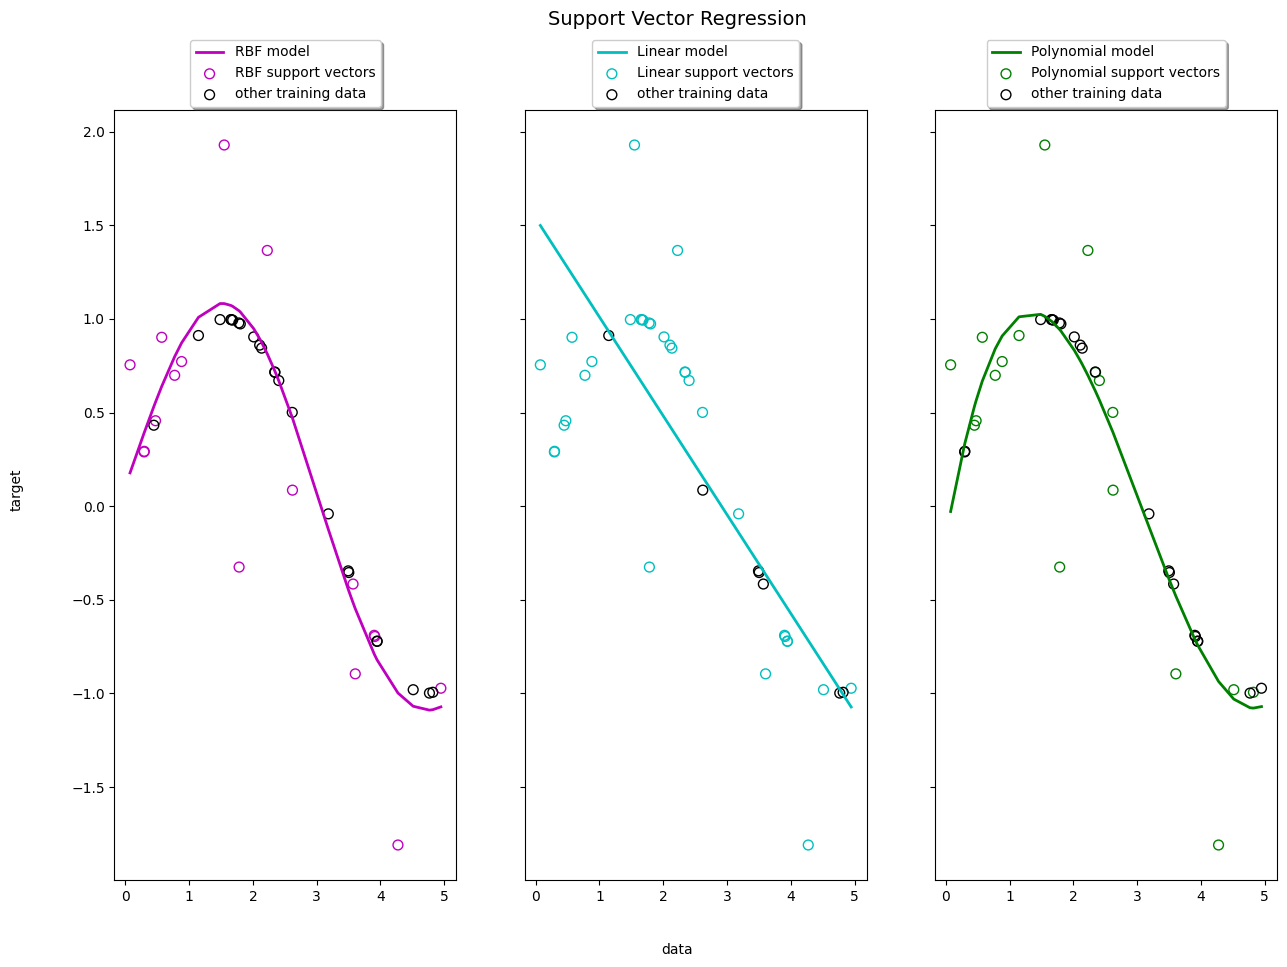

In [66]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [67]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0, coef0=1)

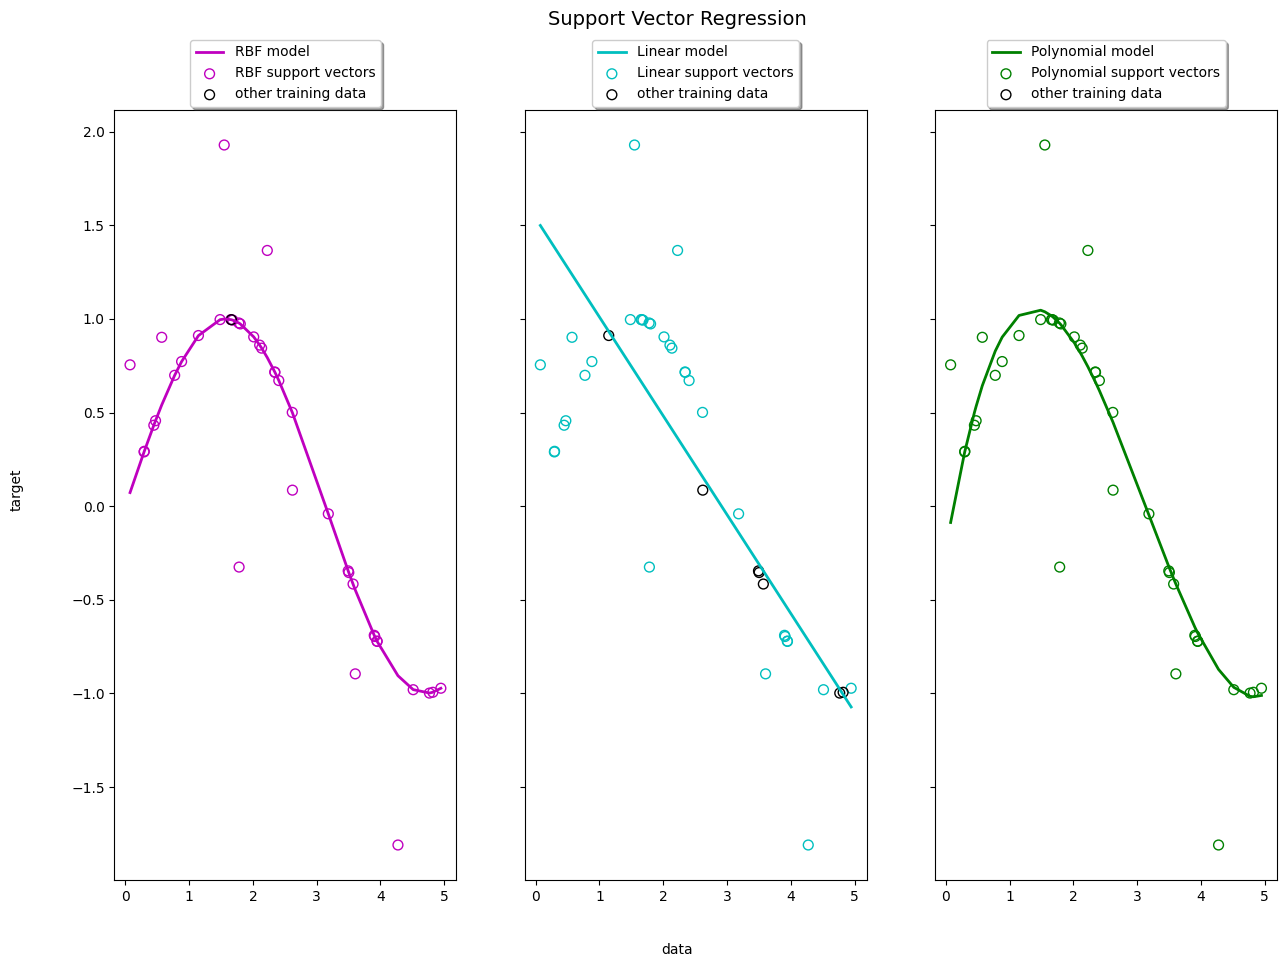

In [68]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

/home/petka/UJEP/USU/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


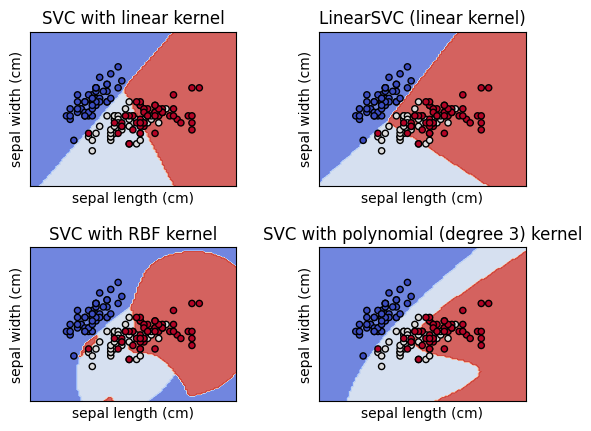

In [55]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1000  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

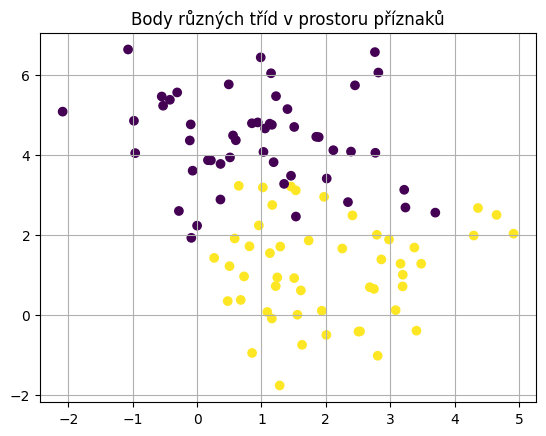

In [56]:
dim = 2 # dimenze ulohy
samples = 100
X, y = make_blobs(n_samples=samples, centers=2, random_state=0, cluster_std=1.2)
y[y==0] = -1 # udelej tridy -1/1
plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

In [57]:
n,dim=X.shape

P = np.zeros((dim+1+n,dim+1+n))
for i in range(0, dim):
    P[i,i]=1 

q = C*np.ones(dim+1+n)
q[:dim+1] = 0

h = np.concatenate((-1*np.ones((n,1)), np.zeros((n,1))))

G = np.zeros((2*n, n+dim+1))
for i,(x,y) in enumerate(zip(X,y)):
    G[i,:dim] = -y*x 
    G[i,dim] = -y
    G[i,dim+1+i] = -1
    G[i+n,dim+1+i] = -1

sol = solvers.qp(matrix(P), matrix(q), matrix(G), matrix(h))
w = sol['x']
print(w)

     pcost       dcost       gap    pres   dres
 0: -8.2976e+07  3.6934e+07  1e+08  2e+03  6e+00
 1:  7.3455e+05 -3.1886e+06  2e+07  2e+02  5e-01
 2:  1.0002e+06 -1.4119e+05  2e+06  1e+01  4e-02
 3:  7.1343e+04  1.2866e+04  8e+04  3e-01  1e-03
 4:  2.8922e+04  1.4986e+04  2e+04  6e-02  2e-04
 5:  3.0051e+04  1.6387e+04  2e+04  5e-02  2e-04
 6:  2.9553e+04  1.7230e+04  1e+04  3e-02  1e-04
 7:  2.8878e+04  1.7204e+04  1e+04  2e-02  7e-05
 8:  2.4725e+04  1.9303e+04  6e+03  6e-03  2e-05
 9:  2.3606e+04  2.0489e+04  3e+03  1e-04  5e-07
10:  2.2443e+04  2.0768e+04  2e+03  2e-05  6e-08
11:  2.1667e+04  2.1246e+04  4e+02  2e-06  6e-09
12:  2.1452e+04  2.1396e+04  6e+01  3e-08  1e-10
13:  2.1422e+04  2.1418e+04  4e+00  2e-09  8e-12
14:  2.1420e+04  2.1419e+04  1e-01  5e-11  3e-13
15:  2.1419e+04  2.1419e+04  1e-03  5e-13  7e-14
Optimal solution found.
[ 2.82e-01]
[-1.38e+00]
[ 3.13e+00]
[ 7.42e-09]
[ 6.25e-09]
[ 6.25e-09]
[ 1.45e+00]
[ 6.25e-09]
[ 1.18e+00]
[ 6.26e-09]
[ 3.19e-01]
[ 6.26e-09]


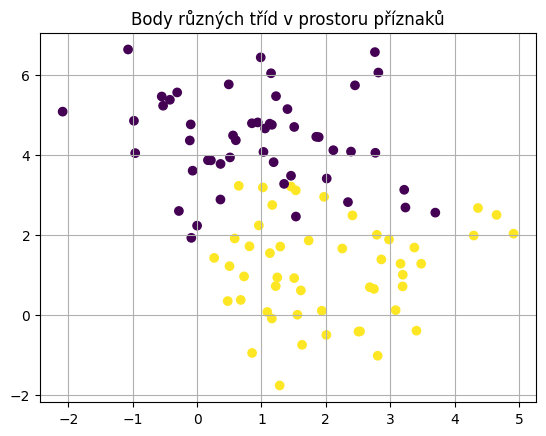

In [58]:
dim = 2 # dimenze ulohy
samples = 100
X, y = make_blobs(n_samples=samples, centers=2, random_state=0, cluster_std=1.2)
y[y==0] = -1 # udelej tridy -1/1
plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

P:(103, 103)
q:(103,)
G:(200, 103)
h:(200, 1)
     pcost       dcost       gap    pres   dres
 0: -8.1284e+03  5.2313e+03  2e+04  2e+01  9e+00
 1:  5.4824e+02 -4.2125e+02  3e+03  2e+00  8e-01
 2:  3.2505e+02  1.0283e+02  4e+02  2e-01  1e-01
 3:  2.5096e+02  1.6418e+02  1e+02  8e-02  3e-02
 4:  2.3923e+02  1.8379e+02  8e+01  4e-02  2e-02
 5:  2.3611e+02  1.9557e+02  5e+01  1e-02  5e-03
 6:  2.2772e+02  2.0444e+02  3e+01  5e-03  2e-03
 7:  2.2273e+02  2.1053e+02  1e+01  1e-03  4e-04
 8:  2.1715e+02  2.1376e+02  4e+00  2e-04  1e-04
 9:  2.1580e+02  2.1471e+02  1e+00  3e-05  1e-05
10:  2.1520e+02  2.1515e+02  5e-02  1e-06  5e-07
11:  2.1517e+02  2.1517e+02  4e-03  3e-08  1e-08
12:  2.1517e+02  2.1517e+02  4e-05  3e-10  1e-10
Optimal solution found.


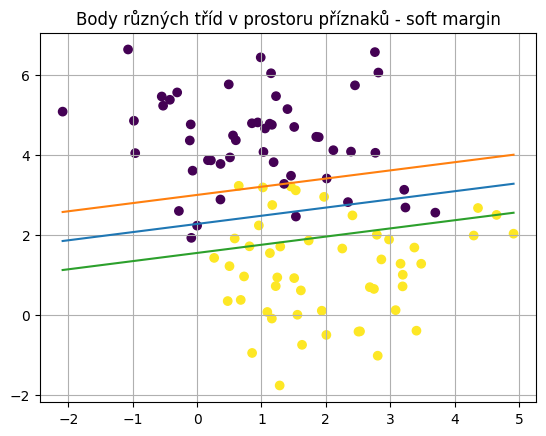

In [59]:
def create_model_SVM_softm_primary(X, y, C=1):
  n,dim=X.shape 

  P = np.zeros((dim+1+n,dim+1+n))
  for i in range(0, dim):
    P[i,i]=1 # prepis 1 na diagonalu pro hodnoty w

  q = C*np.ones(dim+1+n) # linearni clen v ucelove funkci soucet ksi
  q[:dim+1] = 0 #nastav na nulu pozice w a b ve vektoru q

  
  h = np.concatenate((-1*np.ones((n,1)), np.zeros((n,1))))
  
  G = np.zeros((2*n, n+dim+1))
  for i,(x,y) in enumerate(zip(X,y)):
    G[i,:dim] = -y*x # sloupce odpovidajici w
    G[i,dim] = -y  # sloupec odpovidajici b
    G[i,dim+1+i] = -1
    G[i+n,dim+1+i] = -1
  print(f"P:{P.shape}")
  print(f"q:{q.shape}")
  print(f"G:{G.shape}")
  print(f"h:{h.shape}")
  return matrix(P), matrix(q), matrix(G), matrix(h)
# vygeneruj si matice modelu
P, q, G, h = create_model_SVM_softm_primary(X,y, C = 10)
# volej rešič
sol = solvers.qp(P, q, G, h)
w = sol['x']
#vizualizace výsledků
left = np.min(X, axis = 0)
right = np.max(X, axis = 0)
xgr = np.linspace(left[0], right[0],100)
ygr = -(w[0]*xgr + w[2])/w[1]
ygr_p1 = -(w[0]*xgr + w[2]+1)/w[1]
ygr_m1 = -(w[0]*xgr + w[2]-1)/w[1]
plt.scatter(X[:,0],X[:,1], c = y)
plt.plot(xgr,ygr)
plt.plot(xgr,ygr_p1, label = "+1")
plt.plot(xgr,ygr_m1, label = "-1")
plt.grid()
plt.title("Body různých tříd v prostoru příznaků - soft margin")
plt.show()

In [60]:
import numpy as np
from matplotlib.colors import Normalize


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97
